In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#Loading Datasets
data_path = '../../../Data/'
articles_df = pd.read_csv(data_path+'articles.csv', dtype={'article_id' : str, 'product_code' : str})
customers_df = pd.read_csv(data_path+'customers.csv')
transactions_df = pd.read_csv(data_path+'transactions_train.csv', dtype={'article_id' : str})

## articles.csv

In [3]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,0108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,0108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,0110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles_df.dtypes

article_id                      object
product_code                    object
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

#### Verification


In [5]:
#checking missing values for each column
articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [6]:
articles_df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [7]:
#verifying each row has a unique ID
print(f"Each row has unique ID: {articles_df['article_id'].nunique() == len(articles_df.index)}")

Each row has unique ID: True


In [8]:
#verifying article_id are the same format (10-digit numerical)
print(f"Number of records: {len(articles_df.index)}")
print("Value Counts (conforming IDs):")
valid_id = articles_df['article_id'].str.fullmatch("^[0-9]{10}$")
valid_id.value_counts()

Number of records: 105542
Value Counts (conforming IDs):


True    105542
Name: article_id, dtype: int64

In [9]:
#verifying product_code are the same format (10-digit numerical)
print(f"Number of records: {len(articles_df.index)}")
print("Value Counts (conforming IDs):")
valid_id = articles_df['product_code'].str.fullmatch("^[0-9]{7}$")
valid_id.value_counts()

Number of records: 105542
Value Counts (conforming IDs):


True    105542
Name: product_code, dtype: int64

In [10]:
#getting product_type_names that have a one-to-many mapping with product_type_no
unique_type_names = articles_df['product_type_name'].unique()
for n in unique_type_names:
    if articles_df.loc[articles_df['product_type_name'] == n]['product_type_no'].nunique() != 1:
        print(n)

Umbrella


In [11]:
#product type numbers that apply to 'Umbrella'
articles_df.loc[articles_df['product_type_name'] == 'Umbrella']['product_type_no'].unique()

array([532,  83])

In [12]:
articles_df.loc[articles_df['product_type_name'] == 'Umbrella']

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
36,0130035001,0130035,Black Umbrella,532,Umbrella,Items,1010016,Solid,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
719,0289597012,0289597,UMBRELLA,83,Umbrella,Accessories,1010016,Solid,50,Other Pink,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
720,0289597015,0289597,UMBRELLA,83,Umbrella,Accessories,1010001,All over pattern,9,Black,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
721,0289597016,0289597,UMBRELLA,83,Umbrella,Accessories,1010001,All over pattern,51,Light Pink,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
722,0289597022,0289597,UMBRELLA,83,Umbrella,Accessories,1010016,Solid,73,Dark Blue,...,Other Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Umbrella with a telescopic handle and matching...
1104,0318035003,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,2,Transparent,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1105,0318035009,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010001,All over pattern,73,Dark Blue,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1106,0318035015,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,51,Light Pink,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1107,0318035017,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010019,Transparent,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."
1108,0318035018,0318035,Classic Clear umbrella,83,Umbrella,Accessories,1010006,Dot,10,White,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,"Umbrella in transparent, printed plastic with ..."


In [13]:
#getting department_names that have a one-to-many mapping with department_no
unique_department_names = articles_df['department_name'].unique()
for n in unique_department_names:
    if articles_df.loc[articles_df['department_name'] == n]['department_no'].nunique() != 1:
        print(n)

Jersey Basic
Jersey
EQ & Special Collections
Belts
Swimwear
Shirt
Trouser
Small Accessories
Accessories
Bags
Knitwear
Woven bottoms
Shorts
Jersey Fancy
Outwear
Skirt
Jersey License
Blazer
Blouse
Dress
Loungewear
OL Extended Sizes


In [14]:
#getting section_names that have a one-to-many mapping with section_no
unique_section_names = articles_df['section_name'].unique()
for n in unique_section_names:
    if articles_df.loc[articles_df['section_name'] == n]['section_no'].nunique() != 1:
        print(n)

Ladies Other


In [15]:
#section numbers that apply to 'Ladies Other'
articles_df.loc[articles_df['section_name'] == 'Ladies Other']['section_no'].unique()

array([ 4, 17])

### Understanding

<AxesSubplot: >

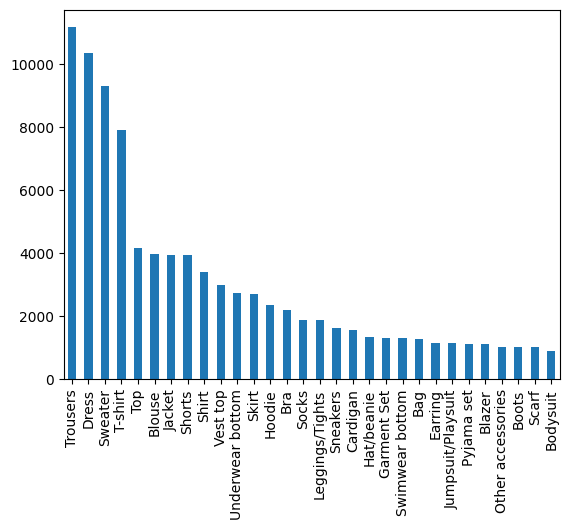

In [16]:
articles_df['product_type_name'].value_counts()[:30].plot.bar()

<AxesSubplot: >

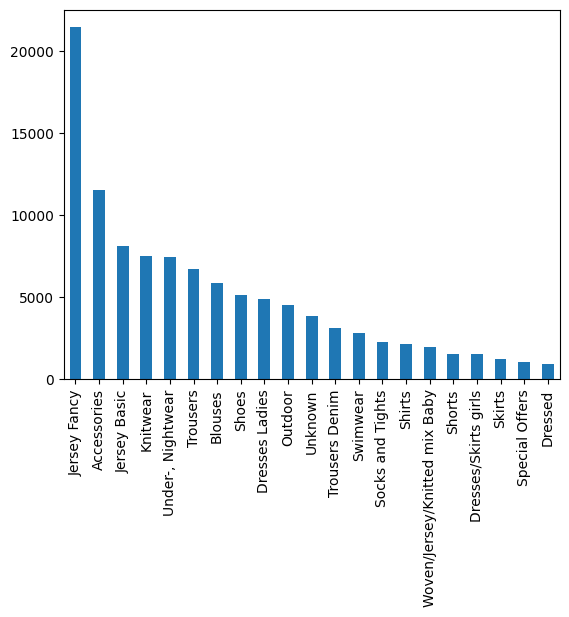

In [17]:
articles_df['garment_group_name'].value_counts().plot.bar()

<AxesSubplot: >

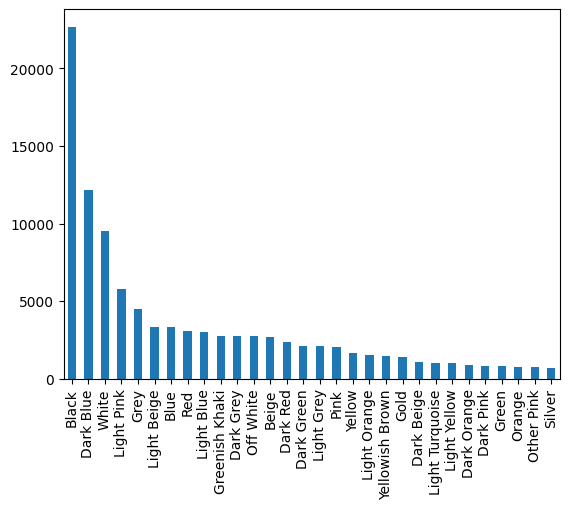

In [18]:
articles_df['colour_group_name'].value_counts()[:30].plot.bar()

<AxesSubplot: >

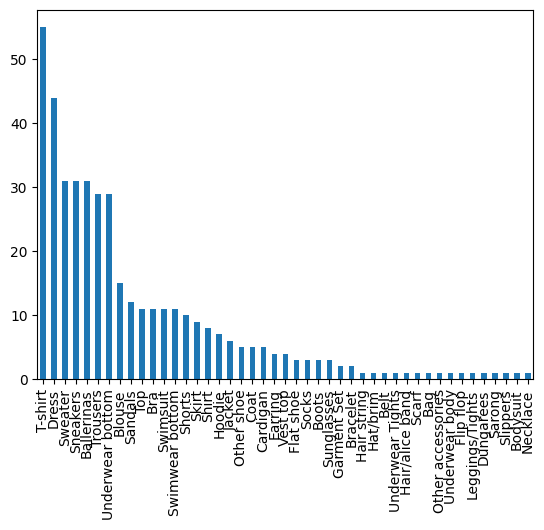

In [19]:
#frequency of product types where detail_desc is missing
articles_df[articles_df['detail_desc'].isna()]['product_type_name'].value_counts().plot.bar()

<AxesSubplot: >

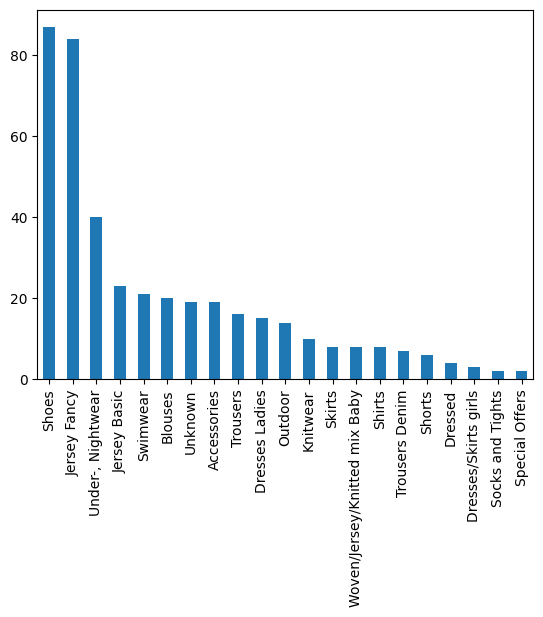

In [20]:
#frequency of garment groups where detail_desc is missing
articles_df[articles_df['detail_desc'].isna()]['garment_group_name'].value_counts().plot.bar()

## customers.csv

In [21]:
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


#### Verification

In [22]:
#checking missing values for each column
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [23]:
#verifying each row has a unique ID
print(f"Each row has unique ID: {customers_df['customer_id'].nunique() == len(customers_df.index)}")

Each row has unique ID: True


In [24]:
#checking that all customer_id conform to standard (64 digit hex value)
print(f"Number of records: {len(customers_df.index)}")
print("Value Counts (conforming IDs):")
valid_id = customers_df['customer_id'].str.fullmatch("^[a-f0-9]{64}$")
valid_id.value_counts()

Number of records: 1371980
Value Counts (conforming IDs):


True    1371980
Name: customer_id, dtype: int64

In [25]:
#checking that all postcode conform to standard (64 digit hex value)
print(f"Number of records: {len(customers_df.index)}")
print("Value Counts (conforming postcodes):")
valid_postcode = customers_df['postal_code'].str.fullmatch("^[a-f0-9]{64}$")
valid_postcode.value_counts()

Number of records: 1371980
Value Counts (conforming postcodes):


True    1371980
Name: postal_code, dtype: int64

In [26]:
#checking existing ages are reasonable
customers_df['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [27]:
#checking how FN is displayed
customers_df['FN'].value_counts(dropna=False)

NaN    895050
1.0    476930
Name: FN, dtype: int64

In [28]:
#checking how active/not active status is displayed
customers_df['Active'].value_counts(dropna=False)

NaN    907576
1.0    464404
Name: Active, dtype: int64

In [29]:
#checking how club member status is displayed
customers_df['club_member_status'].value_counts(dropna=False)

ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [30]:
#checking how fashion news frequency is displayed
customers_df['fashion_news_frequency'].value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [31]:
#standardising so None is set to NONE for fashion news frequency
customers_df['fashion_news_frequency'].replace("None", value="NONE", inplace=True)

#rechecking how fashion news frequency is displayed
customers_df['fashion_news_frequency'].value_counts(dropna=False)

NONE         877713
Regularly    477416
NaN           16009
Monthly         842
Name: fashion_news_frequency, dtype: int64

In [32]:
#looking for anomolies in postcode
customers_df['postal_code'].value_counts().head()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
Name: postal_code, dtype: int64


#### Understanding

<AxesSubplot: ylabel='Frequency'>

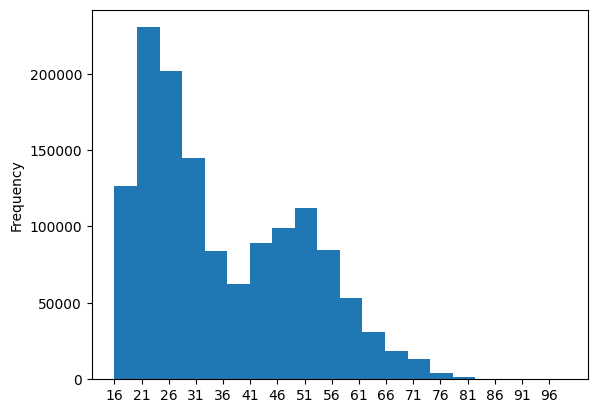

In [33]:
#looking at age range of users with given age
customers_df['age'].plot.hist(bins=20, xticks=range(int(customers_df['age'].min()), 100, 5))

<AxesSubplot: xlabel='age', ylabel='club_member_status'>

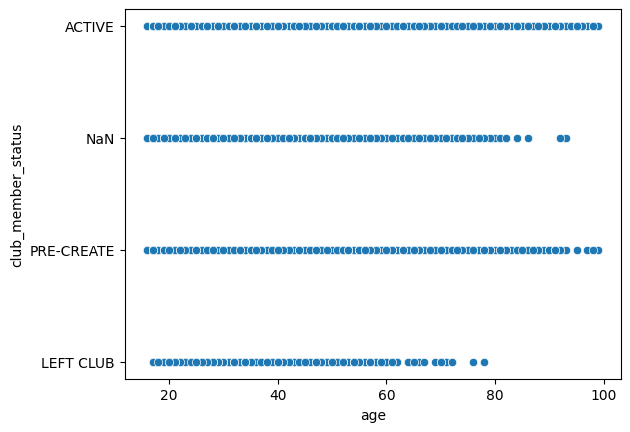

In [34]:
#checking club member status according to age
customers_df['club_member_status'] = customers_df['club_member_status'].fillna("NaN")
sns.scatterplot(data=customers_df, x="age", y="club_member_status")

<AxesSubplot: >

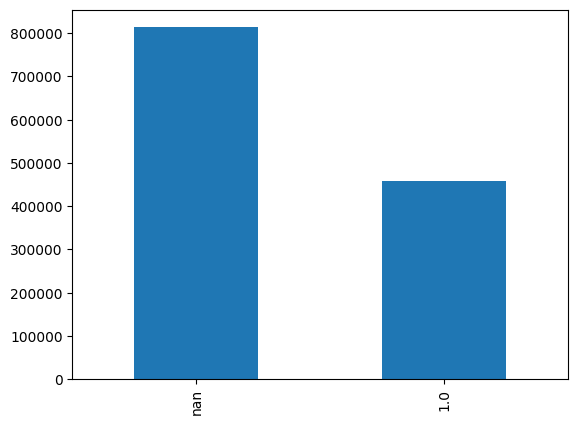

In [35]:
#checking whether club members are active
customers_df[customers_df['club_member_status'] == 'ACTIVE']['Active'].value_counts(dropna=False).plot.bar()

<AxesSubplot: xlabel='age', ylabel='Count'>

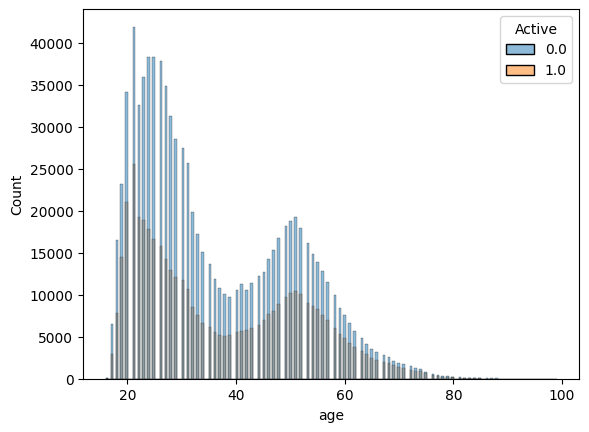

In [36]:
#checking active status according to age
customers_df['Active'] = customers_df['Active'].fillna(0)
sns.histplot(data=customers_df, x='age', hue='Active')

## transactions_train.csv

In [37]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


#### Verification

In [38]:
#checking missing values
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [39]:
#checking that all customer_id conform to standard (64 digit hex value)
print(f"Number of records: {len(transactions_df.index)}")
print("Value Counts (conforming IDs):")
valid_id = transactions_df['customer_id'].str.fullmatch("^[a-f0-9]{64}$")
valid_id.value_counts()

Number of records: 31788324
Value Counts (conforming IDs):


True    31788324
Name: customer_id, dtype: int64

In [40]:
#verifying article_id are the same format (10-digit numerical)
print(f"Number of records: {len(transactions_df.index)}")
print("Value Counts (conforming IDs):")
valid_id = transactions_df['article_id'].str.fullmatch("^[0-9]{10}$")
valid_id.value_counts()

Number of records: 31788324
Value Counts (conforming IDs):


True    31788324
Name: article_id, dtype: int64

In [41]:
#checking range of prices
transactions_df['price'].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64

#### Understanding

<AxesSubplot: >

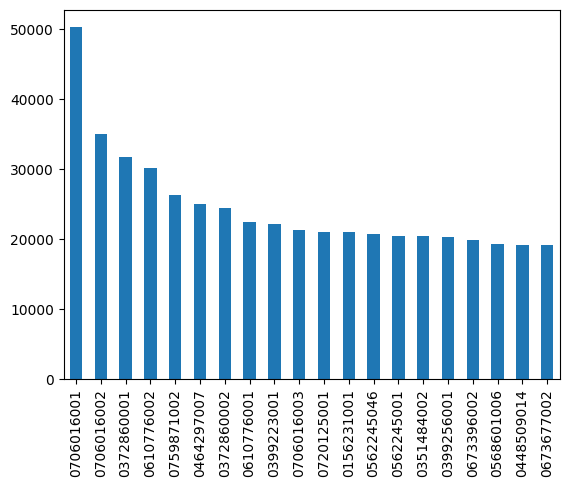

In [42]:
#checking how many times the 20 most popular items were bought
transactions_df['article_id'].value_counts().head(20).plot.bar()

In [43]:
articles_df[articles_df['article_id'] == transactions_df['article_id'].mode()[0]]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,0706016001,0706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


<AxesSubplot: >

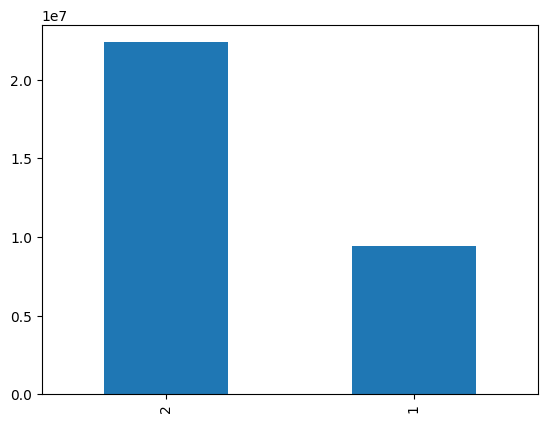

In [44]:
#checking frequency of each sales channel of transactions
transactions_df['sales_channel_id'].value_counts().plot.bar()